In [1]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\vivek\Anaconda3\envs\chatbot\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [3]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents",documents)
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

1059 documents [(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Hey'], 'greeting'), (['Sup'], 'greeting'), (['Whatsup'], 'greeting'), (['Hello', 'there'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey', 'there'], 'greeting'), (['hello', 'there'], 'greeting'), (['hi', 'there'], 'greeting'), (['ssup'], 'greeting'), (['sup'], 'greeting'), (['Whats', 'up'], 'greeting'), (['good', 'morning'], 'greeting'), (['good', 'evening'], 'greeting'), (['good', 'afternoon'], 'greeting'), (['help', 'me'], 'greeting'), (['please', 'help', 'me'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Get', 'lost'], 'goodbye'), (['Bubye'], 'goodbye'), (['Bye', 'Bye'], 'goodbye'), (['Tata'], 'goodbye'), (['See', 'you'], 'goodbye'), (['Nice', 'meeting', 'you'], 'goodbye'), (['it', 'was', 'nice', 'talking', 'to', 'you'], 'goodbye'), (['it', 'wa

In [4]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)
#print(output_empty)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    #print(pattern_words)
    
    # stem each word
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    #print(pattern_words)
    
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    print(bag)
    
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(output_row)
    #print(classes)
    print(classes.index(doc[1]))
  
    output_row[classes.index(doc[1])] = 1
    print(output_row)

    training.append([bag, output_row])
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

3
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

46
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

22
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
#print(training)

# create train and test lists
train_x = list(training[:,0])
print(train_x)
print()
print(len(train_x[0]))
print()
train_y = list(training[:,1])
#print(train_y)
print(len(train_y[0]))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
model = Sequential()
model.add(Dense(40, input_shape=[len(train_x[0],)])) # hidden layer =2/3 * output (60)
model.add(Dense(40))
#model.add(Dense(40))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=16)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                13600     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 62)                2542      
Total params: 17,782
Trainable params: 17,782
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1059/1059 [==============================] - 0s 466us/step - loss: 4.0282 - acc: 0.0859
Epoch 2/500
1059/1059 [==============================] - 0s 119us/step - loss: 3.6590 - acc: 0.2483
Epoch 3/500
1059/1059 [==============================] - 0s 113us/step - loss: 3.0691 - acc: 0.3711
Epoch 4/500
1059/1059 [==============================] - 0s 114us/step - loss: 2.3670 - acc: 0.5779
Ep

1059/1059 [==============================] - 0s 128us/step - loss: 0.0160 - acc: 0.9887
Epoch 76/500
1059/1059 [==============================] - 0s 111us/step - loss: 0.0152 - acc: 0.9924
Epoch 77/500
1059/1059 [==============================] - 0s 105us/step - loss: 0.0169 - acc: 0.9896
Epoch 78/500
1059/1059 [==============================] - 0s 103us/step - loss: 0.0156 - acc: 0.9887
Epoch 79/500
1059/1059 [==============================] - 0s 90us/step - loss: 0.0155 - acc: 0.9915
Epoch 80/500
1059/1059 [==============================] - 0s 120us/step - loss: 0.0138 - acc: 0.9896
Epoch 81/500
1059/1059 [==============================] - 0s 112us/step - loss: 0.0145 - acc: 0.9906
Epoch 82/500
1059/1059 [==============================] - 0s 97us/step - loss: 0.0150 - acc: 0.9896
Epoch 83/500
1059/1059 [==============================] - 0s 109us/step - loss: 0.0141 - acc: 0.9906
Epoch 84/500
1059/1059 [==============================] - 0s 119us/step - loss: 0.0160 - acc: 0.9906
Epoch

1059/1059 [==============================] - 0s 124us/step - loss: 0.0124 - acc: 0.9924
Epoch 156/500
1059/1059 [==============================] - 0s 114us/step - loss: 0.0126 - acc: 0.9887
Epoch 157/500
1059/1059 [==============================] - 0s 124us/step - loss: 0.0130 - acc: 0.9906
Epoch 158/500
1059/1059 [==============================] - 0s 122us/step - loss: 0.0130 - acc: 0.9896
Epoch 159/500
1059/1059 [==============================] - 0s 117us/step - loss: 0.0128 - acc: 0.9906
Epoch 160/500
1059/1059 [==============================] - 0s 140us/step - loss: 0.0123 - acc: 0.9896
Epoch 161/500
1059/1059 [==============================] - 0s 144us/step - loss: 0.0118 - acc: 0.9924
Epoch 162/500
1059/1059 [==============================] - 0s 157us/step - loss: 0.0128 - acc: 0.9887
Epoch 163/500
1059/1059 [==============================] - 0s 187us/step - loss: 0.0113 - acc: 0.9915
Epoch 164/500
1059/1059 [==============================] - 0s 178us/step - loss: 0.0123 - acc: 0

1059/1059 [==============================] - 0s 122us/step - loss: 0.0113 - acc: 0.9906
Epoch 236/500
1059/1059 [==============================] - 0s 97us/step - loss: 0.0114 - acc: 0.9887
Epoch 237/500
1059/1059 [==============================] - 0s 123us/step - loss: 0.0112 - acc: 0.9934
Epoch 238/500
1059/1059 [==============================] - 0s 97us/step - loss: 0.0113 - acc: 0.9896
Epoch 239/500
1059/1059 [==============================] - 0s 122us/step - loss: 0.0114 - acc: 0.9915
Epoch 240/500
1059/1059 [==============================] - 0s 97us/step - loss: 0.0112 - acc: 0.9906
Epoch 241/500
1059/1059 [==============================] - 0s 126us/step - loss: 0.0138 - acc: 0.9896
Epoch 242/500
1059/1059 [==============================] - 0s 110us/step - loss: 0.0119 - acc: 0.9924
Epoch 243/500
1059/1059 [==============================] - 0s 96us/step - loss: 0.0119 - acc: 0.9906
Epoch 244/500
1059/1059 [==============================] - 0s 123us/step - loss: 0.0116 - acc: 0.991

1059/1059 [==============================] - 0s 126us/step - loss: 0.0107 - acc: 0.9887
Epoch 316/500
1059/1059 [==============================] - 0s 119us/step - loss: 0.0110 - acc: 0.9906
Epoch 317/500
1059/1059 [==============================] - 0s 116us/step - loss: 0.0112 - acc: 0.9906
Epoch 318/500
1059/1059 [==============================] - 0s 118us/step - loss: 0.0108 - acc: 0.9915
Epoch 319/500
1059/1059 [==============================] - 0s 132us/step - loss: 0.0108 - acc: 0.9906
Epoch 320/500
1059/1059 [==============================] - 0s 117us/step - loss: 0.0111 - acc: 0.9896
Epoch 321/500
1059/1059 [==============================] - 0s 124us/step - loss: 0.0111 - acc: 0.9915
Epoch 322/500
1059/1059 [==============================] - 0s 117us/step - loss: 0.0110 - acc: 0.9896
Epoch 323/500
1059/1059 [==============================] - 0s 124us/step - loss: 0.0113 - acc: 0.9887
Epoch 324/500
1059/1059 [==============================] - 0s 126us/step - loss: 0.0117 - acc: 0

1059/1059 [==============================] - 0s 163us/step - loss: 0.0106 - acc: 0.9896
Epoch 396/500
1059/1059 [==============================] - 0s 131us/step - loss: 0.0106 - acc: 0.9877
Epoch 397/500
1059/1059 [==============================] - 0s 142us/step - loss: 0.0105 - acc: 0.9896
Epoch 398/500
1059/1059 [==============================] - 0s 164us/step - loss: 0.0105 - acc: 0.9906
Epoch 399/500
1059/1059 [==============================] - 0s 134us/step - loss: 0.0108 - acc: 0.9906
Epoch 400/500
1059/1059 [==============================] - 0s 153us/step - loss: 0.0105 - acc: 0.9906
Epoch 401/500
1059/1059 [==============================] - 0s 145us/step - loss: 0.0108 - acc: 0.9896
Epoch 402/500
1059/1059 [==============================] - 0s 143us/step - loss: 0.0101 - acc: 0.9906
Epoch 403/500
1059/1059 [==============================] - 0s 134us/step - loss: 0.0107 - acc: 0.9915
Epoch 404/500
1059/1059 [==============================] - 0s 146us/step - loss: 0.0108 - acc: 0

1059/1059 [==============================] - 0s 123us/step - loss: 0.0103 - acc: 0.9906
Epoch 476/500
1059/1059 [==============================] - 0s 112us/step - loss: 0.0105 - acc: 0.9868
Epoch 477/500
1059/1059 [==============================] - 0s 110us/step - loss: 0.0103 - acc: 0.9896
Epoch 478/500
1059/1059 [==============================] - 0s 112us/step - loss: 0.0105 - acc: 0.9887
Epoch 479/500
1059/1059 [==============================] - 0s 120us/step - loss: 0.0105 - acc: 0.9915
Epoch 480/500
1059/1059 [==============================] - 0s 97us/step - loss: 0.0101 - acc: 0.9896
Epoch 481/500
1059/1059 [==============================] - 0s 119us/step - loss: 0.0108 - acc: 0.9896
Epoch 482/500
1059/1059 [==============================] - 0s 116us/step - loss: 0.0105 - acc: 0.9906
Epoch 483/500
1059/1059 [==============================] - 0s 96us/step - loss: 0.0104 - acc: 0.9906
Epoch 484/500
1059/1059 [==============================] - 0s 110us/step - loss: 0.0109 - acc: 0.9

In [7]:
print(np.array(train_x))
print(np.array(train_y))
print(history)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
model.save('model_ChatBot.h5')

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss'])

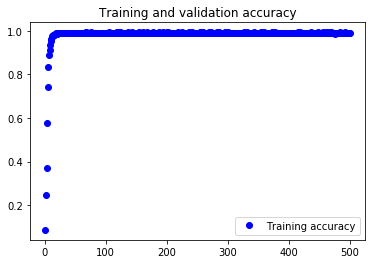

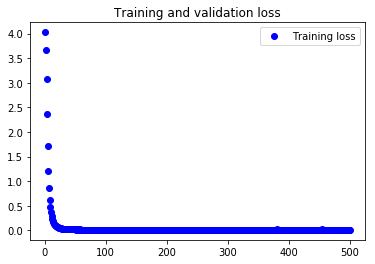

In [10]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    print(sentence_words)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [12]:
p = bow("I would like to know about btech", words)
print (p)
print(words)


['i', 'would', 'like', 'to', 'know', 'about', 'btech']
found in bag: i
found in bag: would
found in bag: like
found in bag: to
found in bag: know
found in bag: about
found in bag: btech
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0]
['!', "'s", '.', 'a', 'about', 'acceptance', 'accommodation', 'accreditation', 'activity', 'address', 'admin', 'administratio